# Buffon's Needle Problem

The problem: A floor has parallel lines at equal distance $l$. A needle of length $a < l$ is dropped at random onto the floor. What is the probability that the needle crosses a line?

This jupyter notebook is allows you to randomly throw (virtual) needles on a (virtual) striped floor. You will need to add some code to complete the task.

But why not try to solve this analytically first?

Assume that the center of the needle hits the floor in a random position with a flat distribution in $x$ and $y$, and that the angle of the needle relative to some axis is a flatly distributed number between $0$ and $2\pi$. 

Especially for the analytical solution, symmetry considerations are very useful to simplify the problem considerably. Let's say the lines on the floor are parallel to the $x$ axis. Then you only care about the distance of the needle from the lines in the perpendicular direction, $y$ (the $x$ position clearly doesn't matter). Also, it is sufficient to consider one single line and $y$ positions between $0$ and $l/2$ from the line - all else is just a repetition of this situation due to the tranlational and mirror symmetry of the situation. Finally, it is sufficient to consider orientations of the needle with an angle relative to the $x$ axis between $0$ and $\pi/2$ (due to mirror symmetry both in x and y).


You can either run this in binder
https://mybinder.org/v2/gh/JonasRademacker/JupyterNotebooksForTeachingMath/master?filepath=BuffonsNeedleProblem.ipynb , 

or - much better, although a bit hasslesome the first time you set it up - you can run it on your own computer. To do that:

1) Download and install anaconda (https://www.anaconda.com/). 

2) Download this file from github. Do so by clicking on "Raw", and then asking your browser to save the file (in Firefox: File -> Save Pages As...) or get the entire set of notebooks via:
git clone https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath.git

3) Open a terminal window, go to the directory where this file is, and type: jupyter notebook

This file should now open in your browser (again), and you can edit it and execute and save the code.

Remember, to excecute each field, do shift+return. Execute the fields in order. If things got messy, go to Kernel and select Restart and Clear all output - and start Shift+Return from the top.

First import some libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let's draw the floor with the lines. It doesn't really matter how many lines we draw (one would do), but for aesthetic reasons, let's draw a few, say 5.

[[[0, 50], [0, 0]], [[0, 50], [10, 10]], [[0, 50], [20, 20]], [[0, 50], [30, 30]], [[0, 50], [40, 40]]]


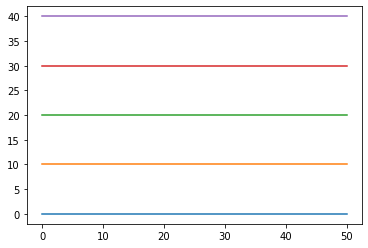

In [2]:
def horizontalLine(y, length):
    line=[[0, length], [y,y]]
    return line

def horizontalLineSet(spacing, howmany):
    length=howmany*spacing
    lineset = []
    for i in range(howmany):
        line=horizontalLine(i*spacing, length)
        lineset.append(line)
    return lineset

def drawHorizontalLines(lineset):
    for line in lineset:
        plt.plot(line[0], line[1])
l=10
numlines=5
lines = horizontalLineSet(l, numlines)
print(lines)
drawHorizontalLines(lines)

Now let's draw the needle on top of this. We will draw it as a function of its length a, the position of its center, (xc,yc), and its angle relative to the x axis, phi.

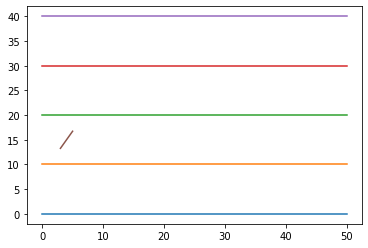

In [3]:
def needle(a, xc, yc, phi):
    xvals = [ xc - a*0.5 * cos(phi), xc + a*0.5 * cos(phi) ]
    yvals = [ yc - a*0.5 * sin(phi), yc + a*0.5 * sin(phi) ]
    return xvals, yvals

a=4
drawHorizontalLines(lines)
needleLine=needle(a, 4, 15, pi/3)
plt.plot(needleLine[0], needleLine[1])

Let's do some random needle throwing. First initialise the random number generator. Change the seed to get different outcomes for (peudo)random numbers used in this sheet.

In [4]:
np.random.seed(2001)

Now we define a function to throw a random needle

In [5]:
def throwNeedle(a, l, numlines):
    flatRandom = np.random.random(3) # three random numbers, each between 0 and 1
    xmin = a/2
    xmax = numlines*l - a/2
    x=flatRandom[0]*(xmax - xmin) + xmin
    ymin = l/2
    ymax = numlines*l - l/2
    y=flatRandom[1]*(ymax - ymin) + ymin
    phi = flatRandom[2]*pi ## [0-pi/2] would give the same result in terms of the frequency with which the needle crosses a line, but would not produce a realistic picture.
    return needle(a, x, y, phi)

Now we have set everything up, let's run it.

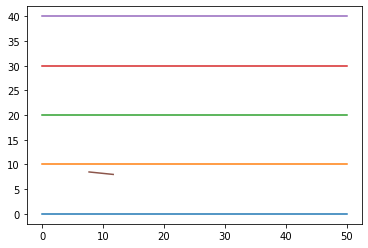

In [6]:
a=4
l=10
numlines=5
needleLine=throwNeedle(a, l, numlines)
drawHorizontalLines(lines)
plt.plot(needleLine[0], needleLine[1])

## And now?

Find a way of throwing many needles and find out what fraction of them crosses a line. How does this compare to the theoretical value you calculated?

PS: You might find this function useful; it returns one if a needle crosses one of the horizontal lines and 0 otherwise.

In [7]:
def doesNeedleCrossLine(needleLine, lineset):
    yneedle_max = max(needleLine[1][0], needleLine[1][1])
    yneedle_min = min(needleLine[1][0], needleLine[1][1])
    for line in lineset:
        yline=line[1][0] # y position of the line
        if yline < yneedle_max and yline >= yneedle_min: return 1
    return 0